# 3 Sum

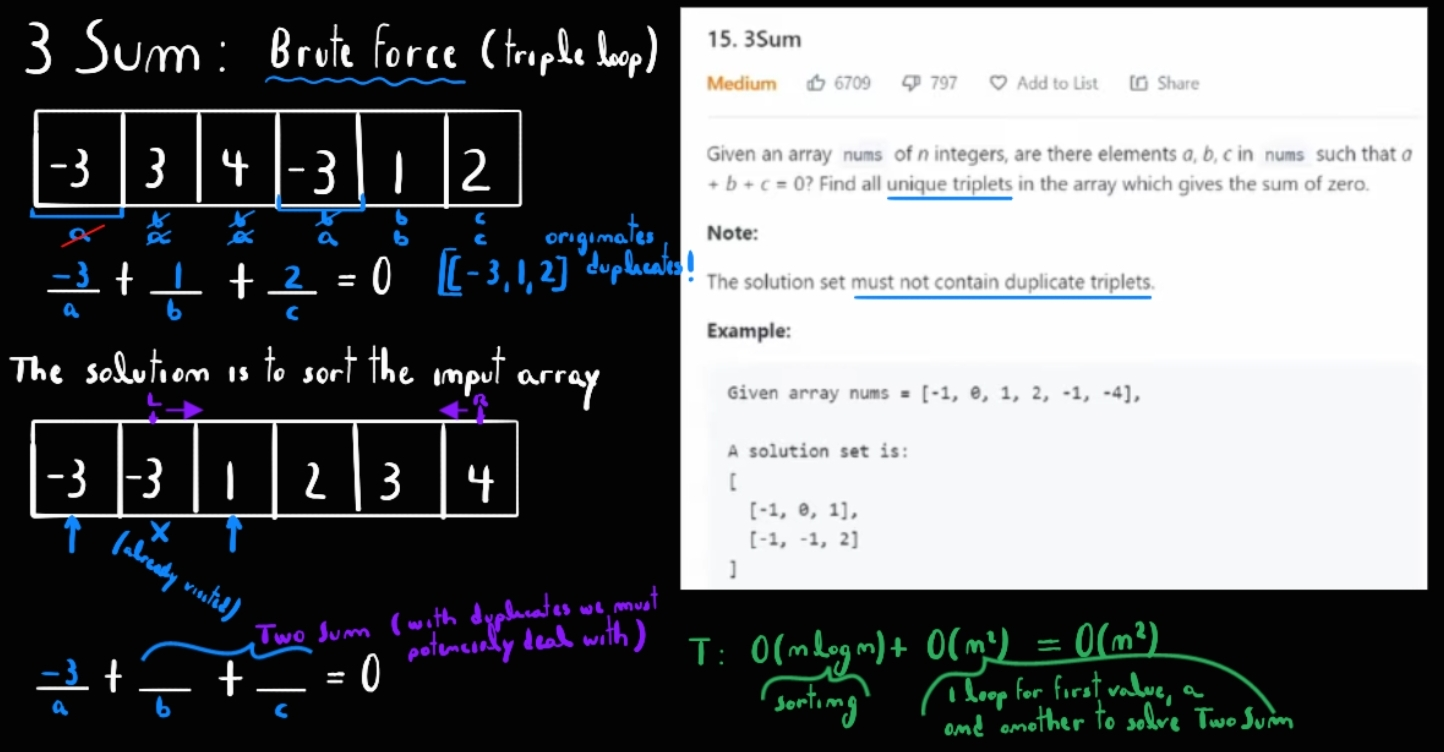

In [ ]:
from typing import List


class Solution:
    def three_sum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)):
            if i > 0 and nums[i - 1] == nums[i]:
                continue
            l, r = i + 1, len(nums) - 1
            while l < r:
                curr_sum = nums[i] + nums[l] + nums[r]
                if curr_sum > 0:
                    r -= 1
                elif curr_sum < 0:
                    l += 1
                else:
                    res.append([nums[i], nums[l], nums[r]])
                    # still need to update the pointers
                    # only one of them as the other will
                    # update in the conditions above
                    l += 1
                    # need to update pointers in case we have
                    # duplicates in the two-sum subproblem
                    while nums[l - 1] == nums[l] and l < r:
                        l += 1
        return res


sol = Solution()
sol.three_sum([-3, 3, 4, -3, 1, 2])

[[-3, 1, 2]]

# Longest Palindromic Substring

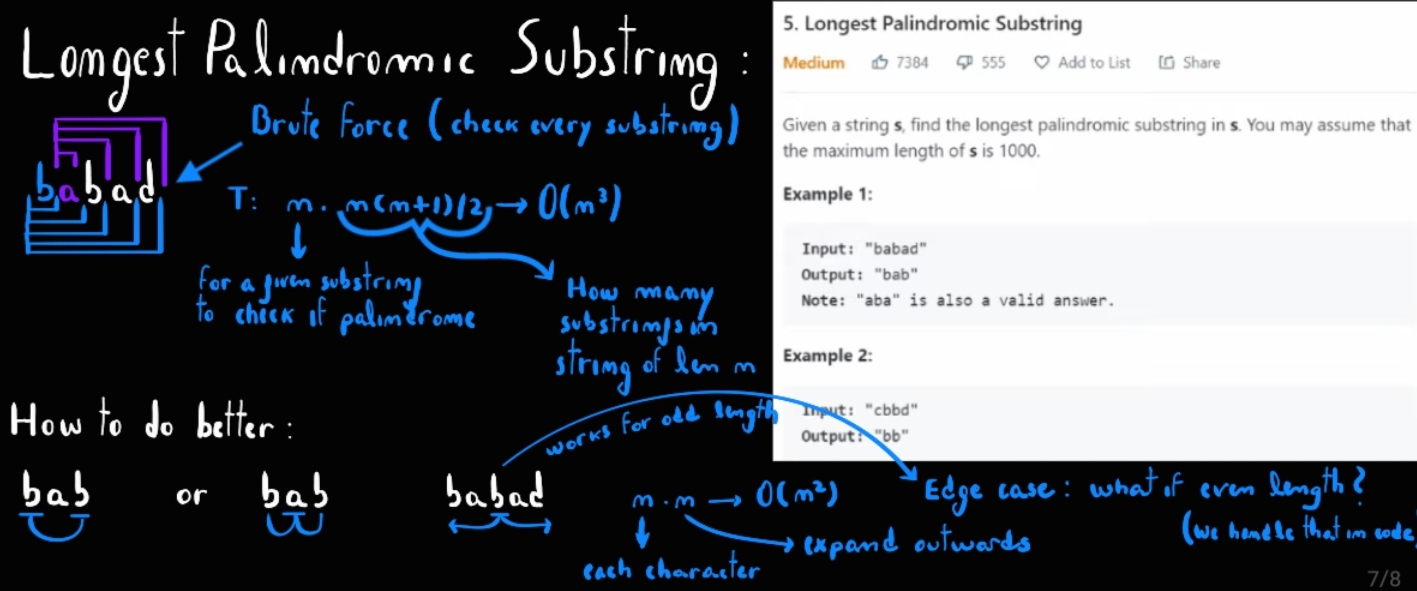

In [ ]:
from typing import List


class Solution:
    def longest_palindrome(self, s: str) -> str:
        res = ""
        res_len = 0
        for i in range(len(s)):
            # odd length
            l, r = i, i
            # check in bounds of string and still palindrome
            while l >= 0 and r < len(s) and s[l] == s[r]:
                # r-l+1 gives len of current str
                if (r - l + 1) > res_len:
                    res = s[l : r + 1]
                    res_len = r - l + 1
                l -= 1
                r += 1
            # even length
            l, r = i, i + 1
            # check in bounds of string and still palindrome
            while l >= 0 and r < len(s) and s[l] == s[r]:
                # r-l+1 gives len of current str
                if (r - l + 1) > res_len:
                    res = s[l : r + 1]
                    res_len = r - l + 1
                l -= 1
                r += 1
        return res


sol = Solution()
sol.longest_palindrome("babad")

'bab'

# Longest Substring without repeating characters

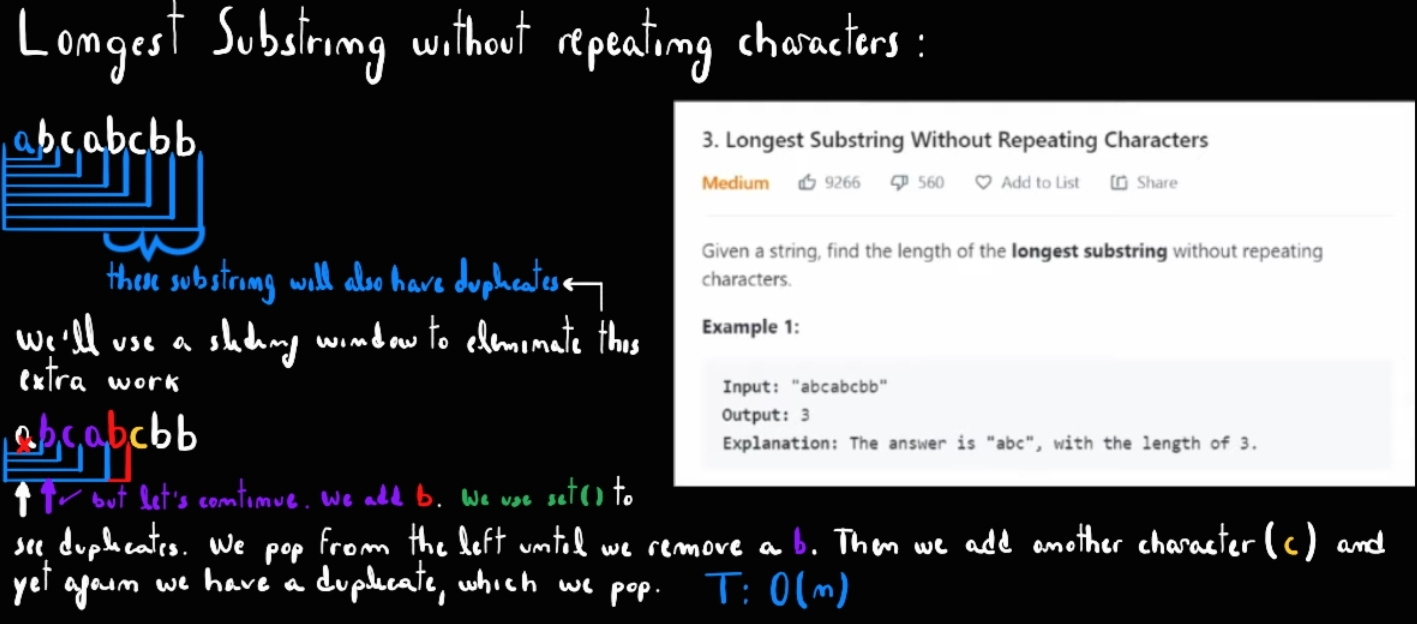

In [ ]:
from typing import List


class Solution:
    def length_longest_substring(self, s: str) -> int:
        char_set = set()
        l = 0
        res = 0
        for r in range(len(s)):
            # detect and remove chars until no more duplicates
            while s[r] in char_set:
                char_set.remove(s[l])
                l += 1
            # after kicking out all duplicates from the set, add
            # the recent char
            char_set.add(s[r])
            res = max(res, r - l + 1)
        return res


sol = Solution()
sol.length_longest_substring("abcdefffffff")

6

# Add Two Numbers

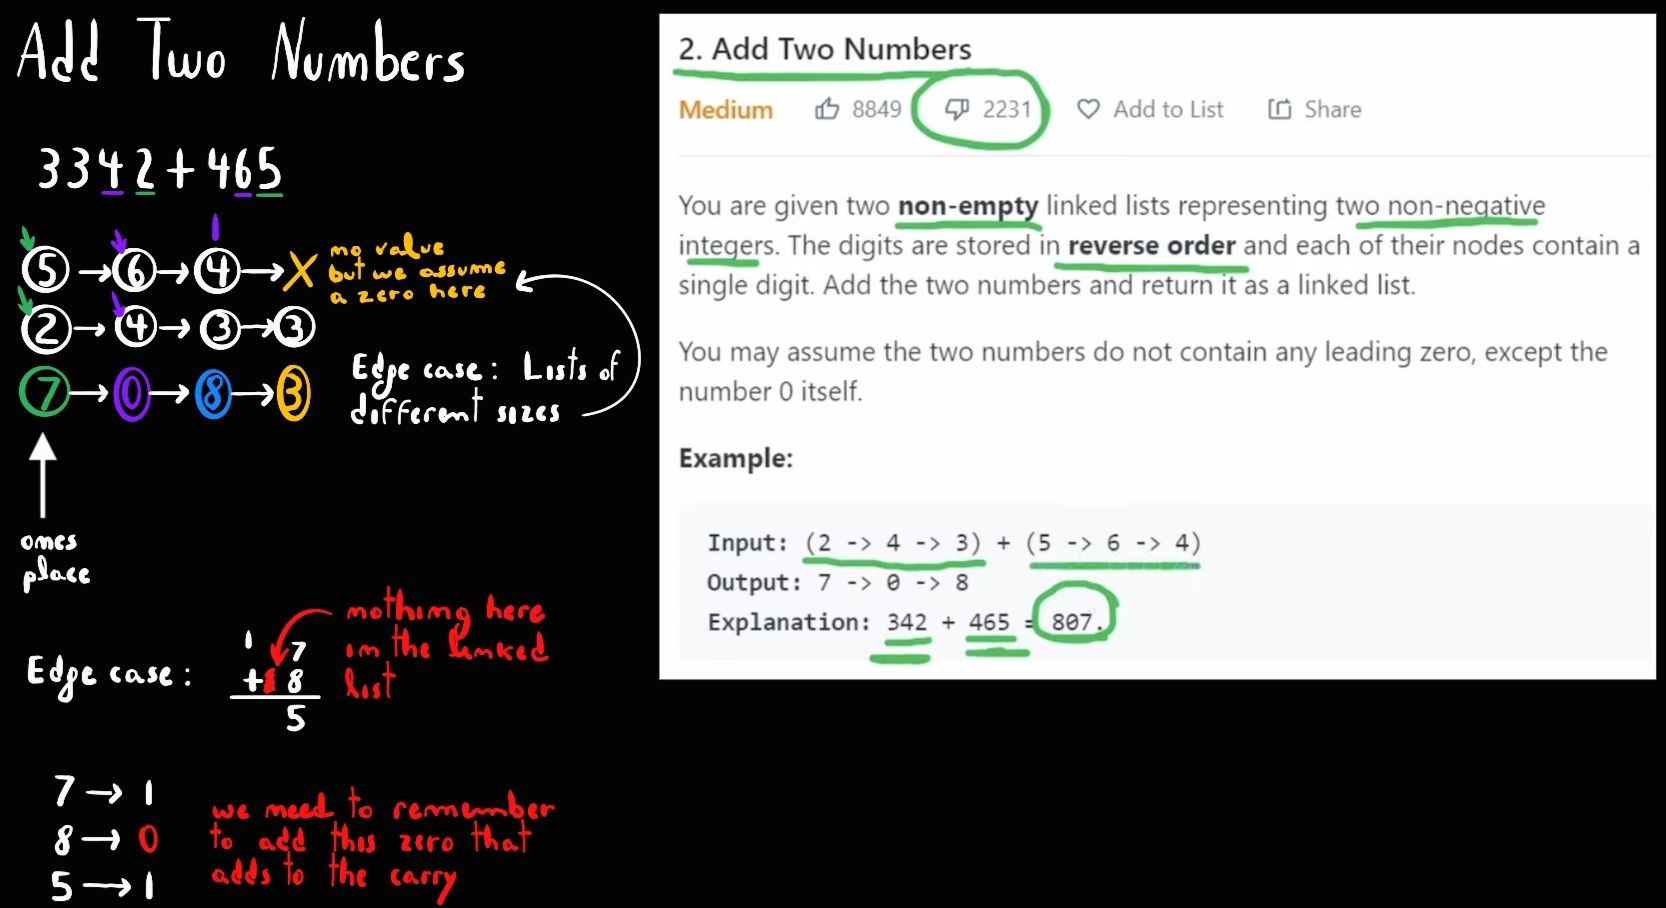

In [4]:
from typing import List


# Definition for singly linked list
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    def visualize(self):
        nodes = []
        cur = self
        while cur:
            nodes.append(str(cur.val))
            cur = cur.next
        return " -> ".join(nodes) + " -> None"


class Solution:
    def add_two_numbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        # the dummy node is used to simplify the handling of the head node
        # in the resulting linked list. the dummy ensures there's always a
        # "previous" node (cur) to attach new nodes to via cur.next
        # all new nodes are appended to cur.next, whether it's the first node,
        # middle node, or last node
        dummy = ListNode()
        cur = dummy
        # carry initializes to zero to deal with the different sizes edge case
        carry = 0
        # or carry deals with the 7+8 edge case because l1 and l2 would be null
        # hence v1 and v2 would be 0 and the loop would stop, leaving the carry
        while l1 or l2 or carry:
            v1 = l1.val if l1 else 0
            v2 = l2.val if l2 else 0
            # new digit
            val = v1 + v2 + carry
            # imagine 'val' is 15 for example - a 2 digit number
            # we need to get the carry out of that
            carry = val // 10
            # and this will give us the ones place
            val = val % 10
            cur.next = ListNode(val)
            # update pointers
            cur = cur.next
            l1 = l1.next if l1 else None
            l2 = l2.next if l2 else None
        # dummy is not part of the result but we attach the cur to it and access
        #
        return dummy.next


sol = Solution()
sol.add_two_numbers(ListNode(243), ListNode(564)).visualize()

'7 -> 0 -> 8 -> None'

# Course Schedule

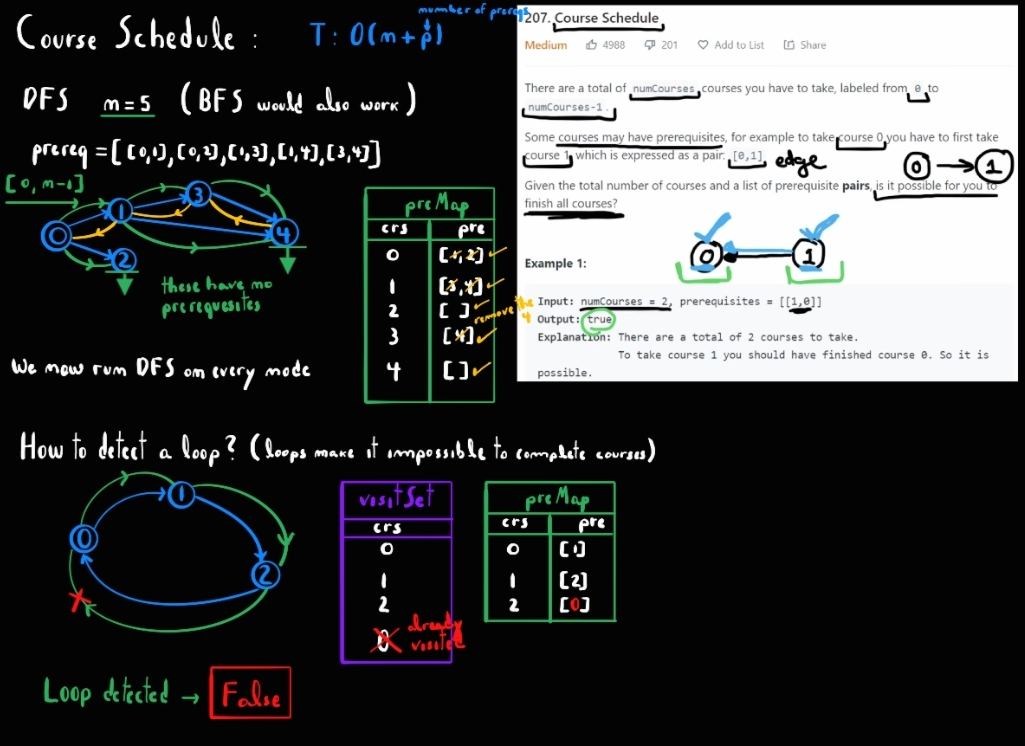

In [ ]:
from typing import List


class Solution:
    def can_finish(self, num_courses: int, prereqs: List[List[int]]) -> bool:
        # creates empty prereq map
        prereq_map = {i: [] for i in range(num_courses)}
        # fills it
        for crs, prereq in prereqs:
            prereq_map[crs].append(prereq)
        # visit set to store all courses along the DFS path
        vis_set = set()

        def dfs(crs):
            # base case 1 (detected loop):
            if crs in vis_set:
                return False
            # base case 2 (no prereqs, we can complete the course):
            if prereq_map[crs] == []:
                return True
            # if neither above happens, we add the crs to visited
            vis_set.add(crs)
            for prereq in prereq_map[crs]:
                # all it takes is one prereq to return False for us to return False
                if not dfs(prereq):
                    return False
            # we remove the course from visited before returning True
            # because we are done visiting it
            vis_set.remove(crs)
            # also, because we know the course can be visited we set its
            # prerequirements to an empty list to signal that, as we've
            # shown in the diagram
            prereq_map[crs] = []
            return True

        # we have to run dfs for every node because some graphs might not
        # be fully connected graphs ie. 1 -> 2; 3 -> 4
        for crs in range(num_courses):
            if not dfs(crs):
                return False
        return True


sol = Solution()
sol.can_finish(2, [[1, 0]])

True